# Packages

In [1]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import gzip

from HAI_NN import Model, Activations, Layers, Losses, Optimizers
from HAI_NN.Metrics import Accuracies

# Data Preparation

In [34]:
# URL of the Fashion MNIST dataset files
url = 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/'

# Create a directory to store the downloaded files
if not os.path.exists('tests/data'):
    os.makedirs('tests/data')

# Download the training and testing image files
for file_name in ['train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz']:
    file_url = url + file_name
    file_path = os.path.join('tests/data', file_name)
    if not os.path.exists(file_path):
        urllib.request.urlretrieve(file_url, file_path)

# Download the training and testing label files
for file_name in ['train-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz']:
    file_url = url + file_name
    file_path = os.path.join('tests/data', file_name)
    if not os.path.exists(file_path):
        urllib.request.urlretrieve(file_url, file_path)

In [2]:
# Load the training and testing image files
with gzip.open('tests/data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open('tests/data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

# Load the training and testing label files
with gzip.open('tests/data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open('tests/data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)
    
print('train set shape:', train_images.shape, 'test set shape:', test_images.shape)

train set shape: (60000, 28, 28) test set shape: (10000, 28, 28)


In [3]:
# Label index to label name relation
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

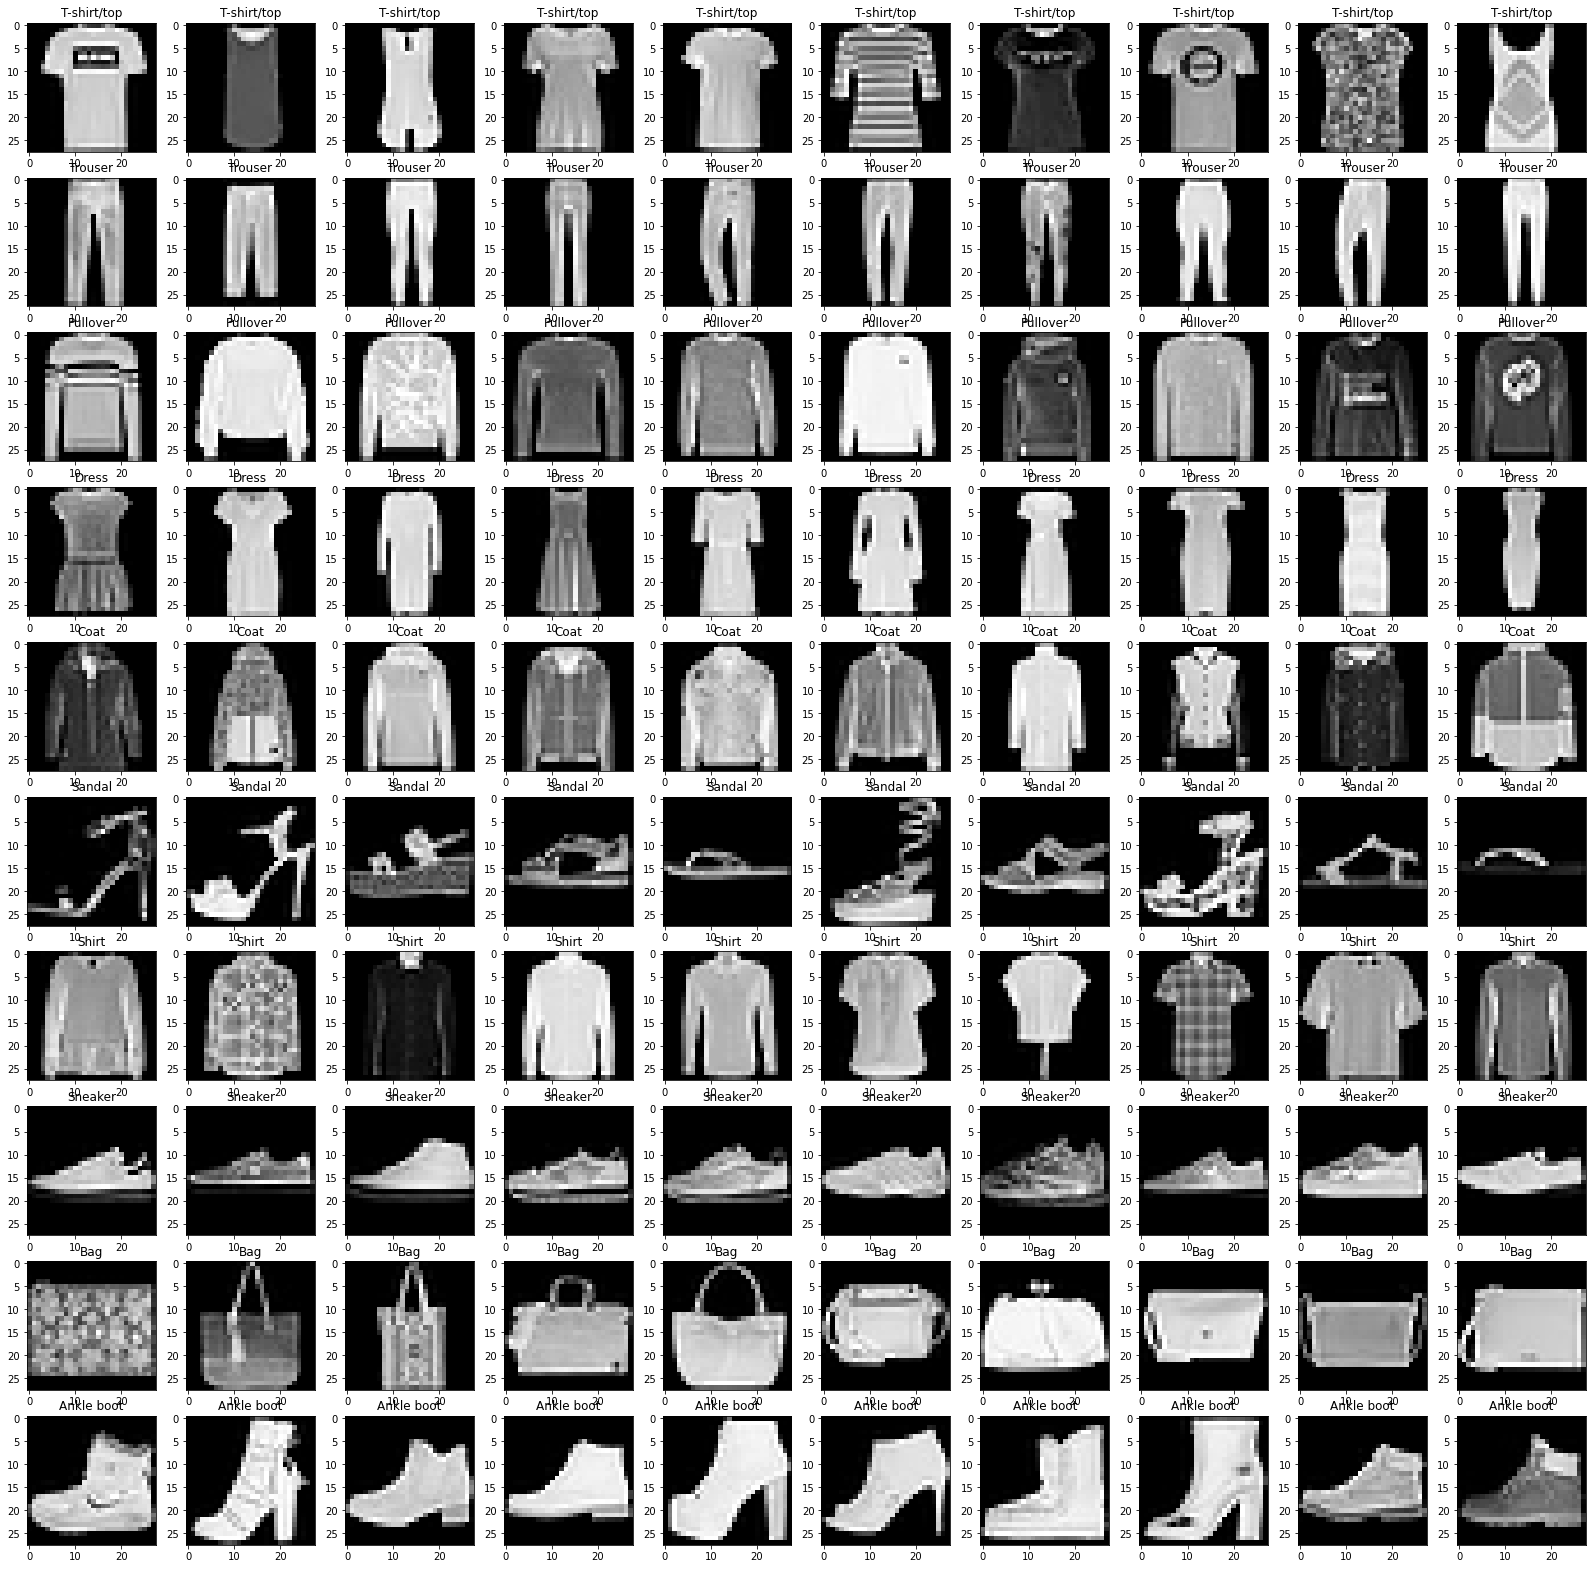

In [4]:
figure, ax = plt.subplots(10, 10, figsize=(28, 28))
for label in range(10):
    samples = train_images[train_labels == label]
    for i in range(10):
        ax[label, i].imshow(samples[i], cmap='gray')
        ax[label, i].set_title(fashion_mnist_labels[label])
plt.show()

# Data Preprocessing

In [5]:
# Flatten and Min-Max scale to (-1, 1)
X = (train_images.reshape(train_images.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (test_images.reshape(test_images.shape[0], -1).astype(np.float32) - 127.5) / 127.5

# Model Initialization and training

## Instantiate model

In [6]:
# # Instantiate model
model = Model.Model([
    Layers.Dense(X.shape[1], 128),
    Activations.ReLU(),
    Layers.Dense(128, 256),
    Activations.ReLU(),
    Layers.Dense(256, 128),
    Activations.ReLU(),
    Layers.Dense(128, 10),
    Activations.Softmax()
])


## Compile

In [7]:
model.compile(loss=Losses.CategoricalCrossEntropy(),
              optimizer=Optimizers.Adam(decay=1e-4),
              accuracy=Accuracies.Categorical_Accuracy()
)

## Train


In [8]:
model.train(X, train_labels, validation_data=(X_test, test_labels),
            epochs=10, batch_size=128, print_every=100)

epoch: 1, acc: 0.819, loss: 0.497 (data_loss: 0.497, reg_loss: 0.000), lr: 0.000955292319449751823194497518
epoch: 2, acc: 0.868, loss: 0.360 (data_loss: 0.360, reg_loss: 0.000), lr: 0.000914327512114839475121148394
epoch: 3, acc: 0.883, loss: 0.317 (data_loss: 0.317, reg_loss: 0.000), lr: 0.000876731544800982315448009827
epoch: 4, acc: 0.893, loss: 0.287 (data_loss: 0.287, reg_loss: 0.000), lr: 0.000842105263157894752631578947
epoch: 5, acc: 0.902, loss: 0.263 (data_loss: 0.263, reg_loss: 0.000), lr: 0.000810110174983797801749837978
epoch: 6, acc: 0.908, loss: 0.243 (data_loss: 0.243, reg_loss: 0.000), lr: 0.000780457348005931673480059316
epoch: 7, acc: 0.915, loss: 0.225 (data_loss: 0.225, reg_loss: 0.000), lr: 0.000752898659840385686598403856
epoch: 8, acc: 0.921, loss: 0.210 (data_loss: 0.210, reg_loss: 0.000), lr: 0.000727219838557195998385571959
epoch: 9, acc: 0.926, loss: 0.198 (data_loss: 0.198, reg_loss: 0.000), lr: 0.000703234880450070248804500702
epoch: 10, acc: 0.931, loss:

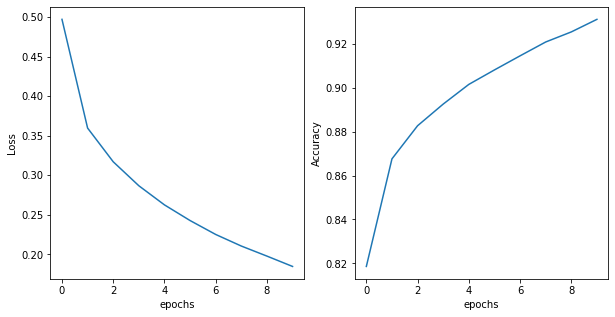

In [10]:
loss_history, accuracy_history = model.history()
figure, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(loss_history)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(accuracy_history)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Accuracy')
plt.show()

# Save model

In [11]:
model.save('tests/fashion_mnist.model')

# Load model

In [12]:
# load model if already trained
# model = Model.Model.load('tests/fashion_mnist.model')

# Out of set testing

tshirt.png --> T-shirt/top (0)
pants.png --> T-shirt/top (0)
pyjamas.jpg --> Trouser (1)
ankle boot.jpg --> Ankle boot (9)
heels.jpg --> Sandal (5)
sneakers.jpg --> Sneaker (7)
sneakers2.jpg --> Sneaker (7)
coat.jpg --> Coat (4)
coat2.jpg --> Coat (4)


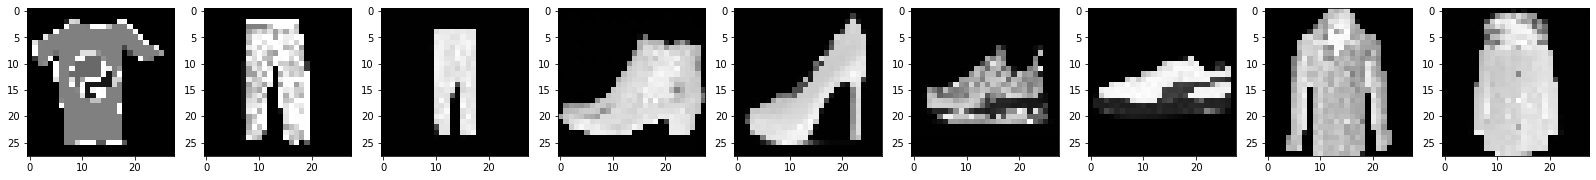

In [13]:
internet_images = ['tshirt.png', 'pants.png', 'pyjamas.jpg', 'ankle boot.jpg', 'heels.jpg', 'sneakers.jpg', 'sneakers2.jpg', 'coat.jpg', 'coat2.jpg']

figure, ax = plt.subplots(1, len(internet_images), figsize=(28, 28))

for index, image in enumerate(internet_images):
    
    image_data = cv2.imread('tests/'+image, cv2.IMREAD_GRAYSCALE)
    # resize image to match model input dimensions
    image_data = cv2.resize(image_data, (28, 28))
    # invert colors as fashion mnist has inverted colors (black background and light colors for the cloths)
    image_data = 255 - image_data
    
    ax[index].imshow(image_data, cmap='gray')

    image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

    confidences = model.predict(image_data)
    predictions = model.output_layer_activation.predictions(confidences)
    prediction = fashion_mnist_labels[predictions[0]]
    print(image, '-->', prediction, f'({predictions[0]})')
